In [19]:
import pandas as pd

In [20]:
import os
DIR = 'D:/iihmr/workshop/Alzheimer_s Dataset'
print(os.listdir(os.path.join(DIR, 'train')))

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np


In [31]:
import tensorflow as tf
import pathlib, os, json

# ✅ Use dataset paths (yours)
train_dir = pathlib.Path(r"d:/iihmr/workshop/Alzheimer_s Dataset\train")
test_dir  = pathlib.Path(r"d:/iihmr/workshop/Alzheimer_s Dataset\test")



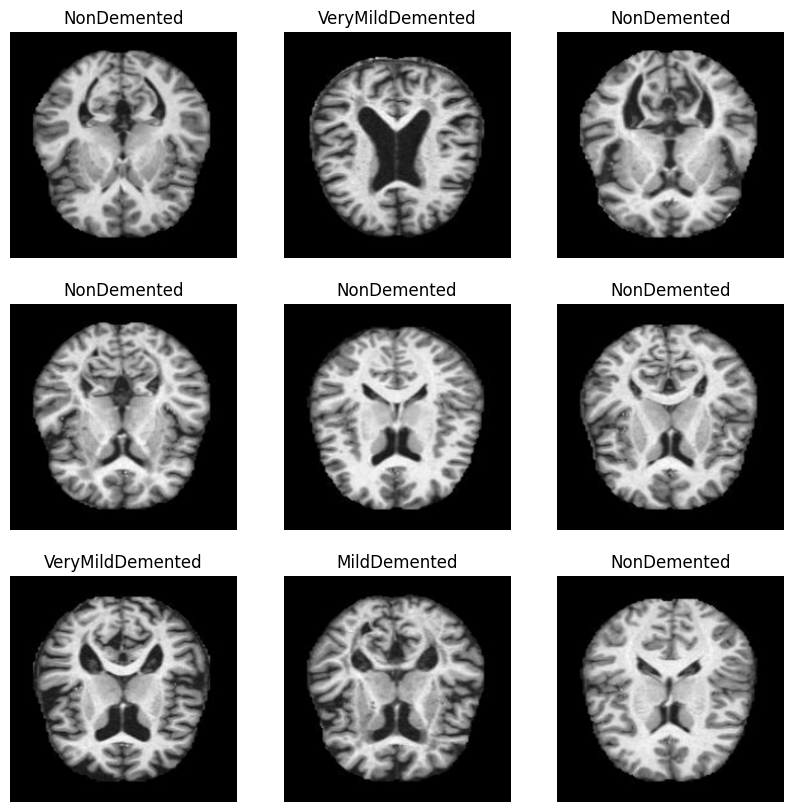

In [38]:
import matplotlib.pyplot as plt

# Take one batch from train_data
for images, labels in train_data.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Show first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
    plt.show()

In [ ]:
img_size = (224, 224)
batch_size = 32

# ✅ Load training dataset
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,   # ✅ fixed
    image_size=img_size,
    batch_size=batch_size
)

# ✅ Load testing/validation dataset
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,   # ✅ fixed
    image_size=img_size,
    batch_size=batch_size
)

# ✅ Get class names
class_names = train_data.class_names
print("Classes:", class_names)

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.
Classes: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [50]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y),
                            num_parallel_calls=AUTOTUNE)


In [51]:
# ✅ Optimize data pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(AUTOTUNE)
test_data = test_data.cache().prefetch(AUTOTUNE)

# ✅ CNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(*img_size, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Added dropout after flatten
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),  # Existing dropout
    tf.keras.layers.Dense(len(class_names), activation="softmax")
])
# ✅ Compile
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)



# ✅ Train
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

# ✅ Save
os.makedirs("models", exist_ok=True)
model.save("models/alzheimer_cnn.keras")

with open("models/class_names.json", "w") as f:
    json.dump(class_names, f)

print("✅ Training complete. Model saved at models/alzheimer_cnn.keras")



Epoch 1/10


d:\iihmr\workshop\Alzheimer_s Dataset\.venv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 254ms/step - accuracy: 0.4987 - loss: 1.0931 - val_accuracy: 0.4949 - val_loss: 0.9799
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - accuracy: 0.5462 - loss: 0.9557 - val_accuracy: 0.5090 - val_loss: 0.9598
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 269ms/step - accuracy: 0.5610 - loss: 0.9093 - val_accuracy: 0.5661 - val_loss: 0.9425
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 264ms/step - accuracy: 0.5753 - loss: 0.8858 - val_accuracy: 0.5598 - val_loss: 0.9384
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 266ms/step - accuracy: 0.5835 - loss: 0.8633 - val_accuracy: 0.5504 - val_loss: 0.9464
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 44s 273ms/step - accuracy: 0.6003 - loss: 0.8298 - val_accuracy: 0.5379 - val_loss: 1.0350
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 45s 277ms/step - accuracy: 0.6259 - loss: 0.8027 - val_accuracy: 0.5520 - val_loss: 0.9607
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 43s 265ms/step - accuracy: 0.6501 - loss: 0.7520 - val

In [52]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test accuracy: {test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5598 - loss: 1.1069
Test accuracy: 0.5598


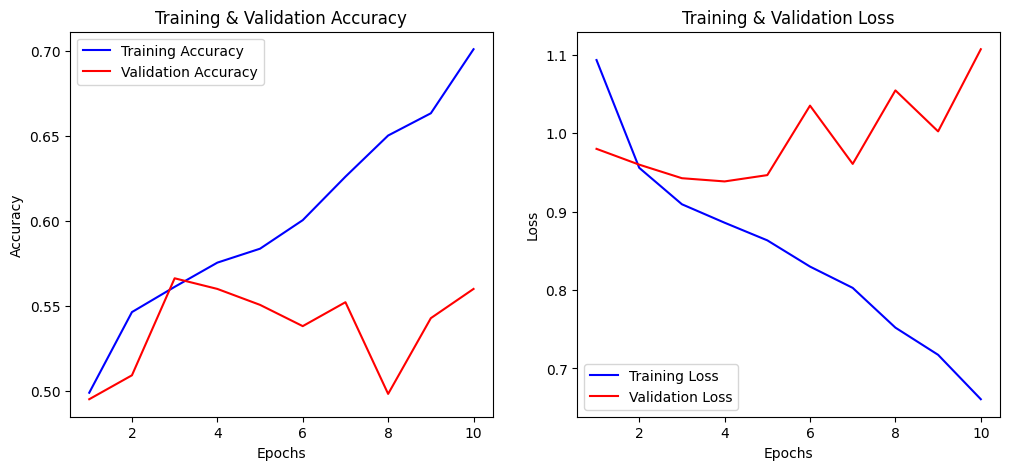

In [53]:
import matplotlib.pyplot as plt

# Extract history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [56]:
from tensorflow.keras.models import load_model

model = load_model("models/alzheimer_cnn.keras", compile=False)

